In [1]:
import astromodels as am
import numpy as np
import astropy.units as u

import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# A simple point source with a power law spectrum

point_source1 = am.PointSource('source_1', ra=125.6, dec=-75.3, spectral_shape=am.powerlaw())

# Another point source with two spectral components, in the Galactic Center

spectrum1 = am.powerlaw()
spectrum1.logK = 1.5  / (u.keV * u.cm * u.cm * u.s)
spectrum1.piv = 1 * u.keV
spectrum1.index = -2.5

component1 = am.SpectralComponent('synchrotron',spectrum1)

spectrum2 = am.powerlaw()
spectrum2.logK = -1
spectrum2.index = -1.2
component2 = am.SpectralComponent('Inverse_Compton',spectrum2)

point_source2 = am.PointSource('source_2', l=0.0, b=0.0, components=[component1,component2])

print(point_source1.main.shape.piv.unit)


keV


In [3]:
# Build a model with the two point sources

my_model = am.Model(point_source1, point_source2)

In [4]:
# Save the model to a file

my_model.save('my_model.yml', overwrite=True)

# Re-load the model from the file, just to show how it is done

my_model_2 = am.load_model('my_model.yml')

In [5]:
# Explore the model we just loaded back
my_model.display()

name,value,min_value,max_value,delta,free,unit
position.ra,125.6,0.0,360.0,12.56,False,
position.dec,-75.3,-90.0,90.0,-7.53,False,
main.powerlaw.index,-2.0,-10,10,-0.2,True,
main.powerlaw.logK,0.0,-40,40,0.0,True,dex(1 / (cm2 keV s))
main.powerlaw.piv,1.0,None,None,0.1,False,keV
name,value,min_value,max_value,delta,free,unit
position.l,0.0,0.0,360.0,0.0,False,
position.b,0.0,-90.0,90.0,0.0,False,
synchrotron.powerlaw.index,-2.5,-10,10,-0.2,True,
synchrotron.powerlaw.logK,0.0,-40,40,0.0,True,dex(1 / (cm2 keV s))


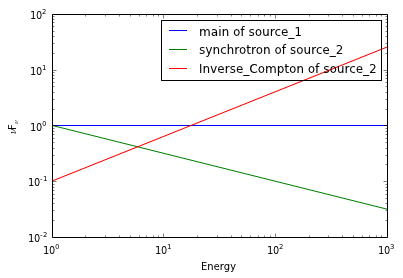

In [6]:
# Now evaluate out models

# Energies where we want to evaluate the model

e = np.logspace(0,3,100)

# Loop over the sources

for src_name, src in my_model.point_sources.iteritems():
    
    # Loop over the components of each source
    
    for comp_name, component in src.components.iteritems():
        
        # Get the differential flux (in ph/cm2/s)
        
        flux = component.shape(e)
        
        # this can also be accomplished with:
        # flux = component.powerlaw(e)
        # but this requires to know the name of the
        # spectral shape which was used
        
        # Plot this component for this source
        
        plt.plot(e,e * e * flux,label="%s of %s" % (component.name, src.name))

plt.legend()
plt.loglog()
plt.xlabel("Energy")
plt.ylabel(r"$\nu$F$_{\nu}$")

In [7]:
my_model.get_point_source_fluxes(0,np.array([1.0,2.0]))

array([ 1.  ,  0.25])